## Import necessary libraries

In [27]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Load the iris dataset

In [28]:

data = load_iris()
X = data.data  
y = data.target  # Labels (3 classes: Setosa, Versicolor, Virginica)


In [29]:
X.shape

(150, 4)

In [30]:
y.shape

(150,)

## Split dataset into training and testing sets

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
X_test.shape

(45, 4)

In [33]:
y_test.shape

(45,)

In [34]:
X_train.shape

(105, 4)

In [35]:
y_train.shape

(105,)

### Initialize AdaBoost classifier 

In [36]:

ada_classifier = AdaBoostClassifier( n_estimators=50, random_state=42)
#(The number of boosting iterations)


### Train the classifier

In [37]:

ada_classifier.fit(X_train, y_train)

c:\Users\Isha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

### Predict on test data

In [38]:

y_pred_ada = ada_classifier.predict(X_test)

In [39]:
y_pred_ada

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

### Calculate accuracy

In [40]:

accuracy = accuracy_score(y_test, y_pred_ada)

In [41]:
accuracy

1.0

### classification report and Confusion matrix

In [42]:

class_report = classification_report(y_test, y_pred_ada)
cm=confusion_matrix(y_test, y_pred_ada)

In [43]:
class_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'

In [44]:
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

###  Visualizing the confusion matrix using Seaborn

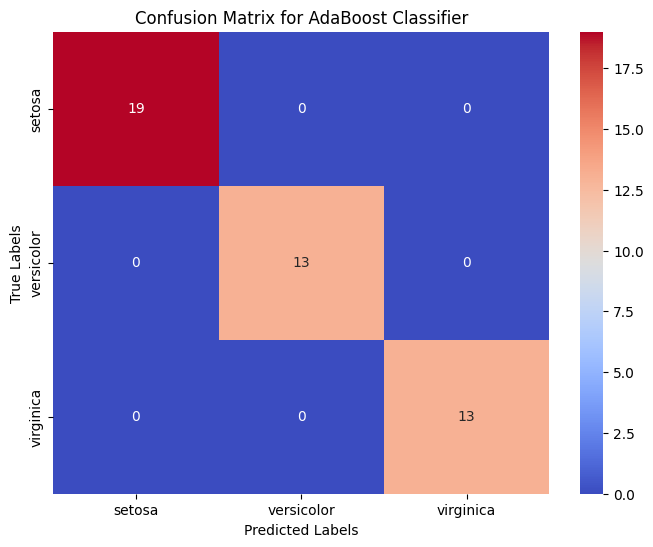

In [17]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
